# Multiple Linear Regression 
Data Set - Index Price

Independent Features: Interest Rate , Unemployment Rate
OUput Feature: Index Price

Predict Index Price based on Independent features

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [6]:
dfIndex = pd.read_csv('indexPrice.csv')
dfIndex.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
# drop unnecessary columns
dfIndex.drop(['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)
dfIndex.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
dfIndex.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [9]:
dfIndex.describe()

,interest_rate,unemployment_rate,index_price
count,24.000000,24.00000,24.000000
mean,2.072917,5.77500,1070.083333
std,0.349527,0.33002,210.735341
min,1.750000,5.30000,704.000000
25%,1.750000,5.50000,928.250000
50%,2.000000,5.85000,1061.000000
75%,2.500000,6.10000,1239.000000
max,2.750000,6.20000,1464.000000


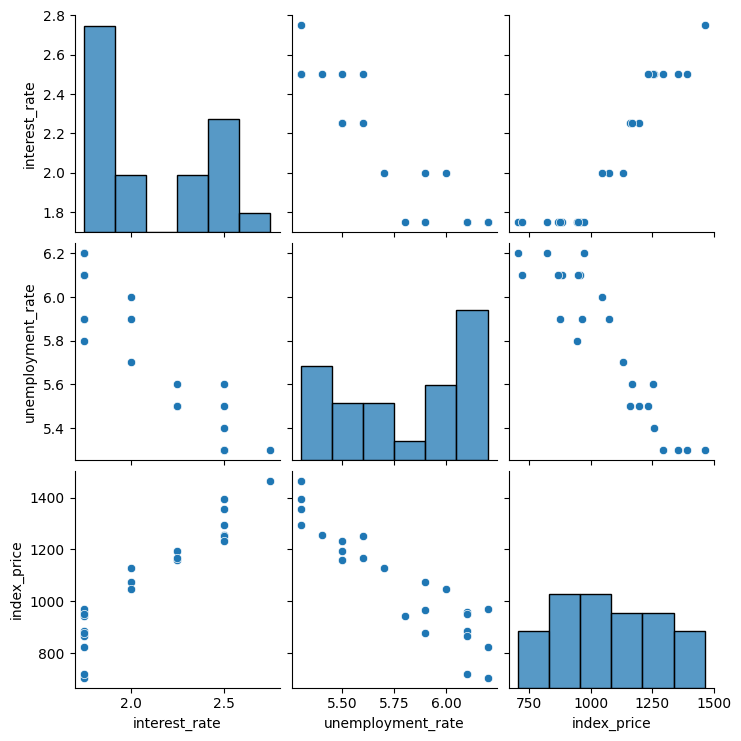

In [10]:
#visualisation using Seaborn
import seaborn as sns
sns.pairplot(dfIndex)

In [11]:
dfIndex.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


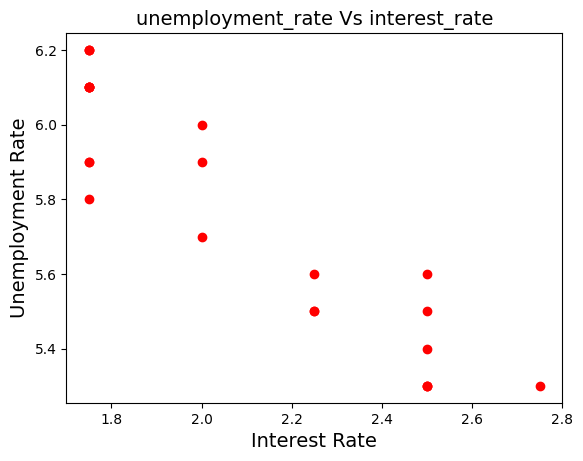

In [18]:
#visualise the data points more closely
plt.scatter(dfIndex['interest_rate'], dfIndex['unemployment_rate'], color='red')
plt.title('unemployment_rate Vs interest_rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=14)
plt.show()

In [19]:
#independent and dependent features
X = dfIndex.iloc[:, :-1]
y = dfIndex.iloc[:, -1]

In [21]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [22]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [23]:
#traintest split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<Axes: xlabel='interest_rate', ylabel='index_price'>

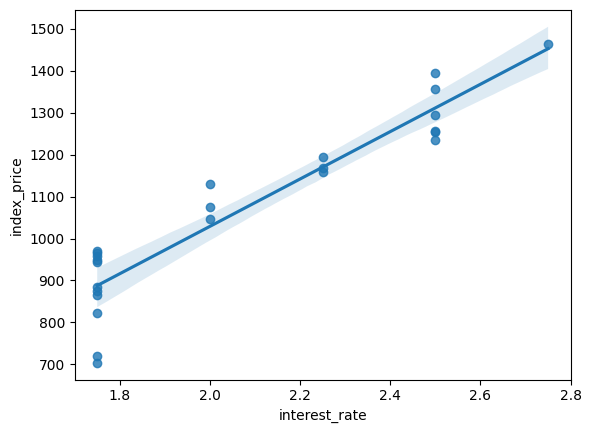

In [25]:
sns.regplot(x="interest_rate", y="index_price", data=dfIndex) #it plotsdata and linear regression model fit

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

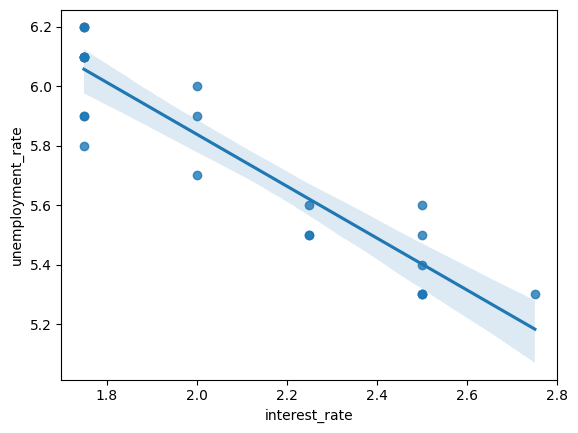

In [26]:
sns.regplot(x="interest_rate", y="unemployment_rate", data=dfIndex)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

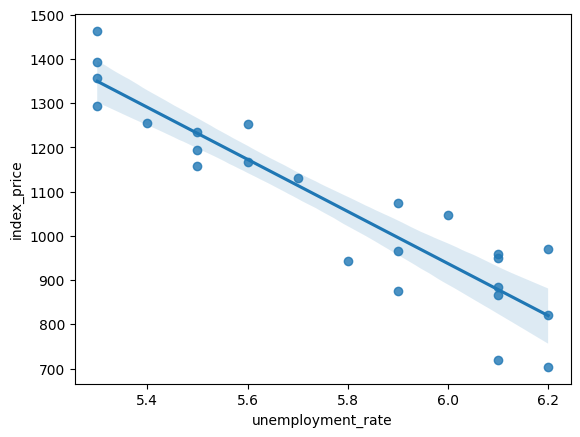

In [27]:
#reg plot between unemployment rate and index price
sns.regplot(x="unemployment_rate", y="index_price", data=dfIndex)

In [28]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [29]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X_train

array([[ 1.03209369, -1.28009521],
       [-1.06895418,  0.45717686],
       [-1.06895418,  1.03626755],
       [-1.06895418,  1.3258129 ],
       [ 0.3317444 , -0.70100452],
       [ 1.03209369, -0.70100452],
       [-1.06895418,  1.03626755],
       [ 1.03209369, -0.99054987],
       [ 1.03209369, -1.28009521],
       [ 1.03209369, -0.41145918],
       [-1.06895418,  1.03626755],
       [ 0.3317444 , -0.41145918],
       [ 0.3317444 , -0.70100452],
       [-1.06895418,  1.03626755],
       [ 1.03209369, -1.28009521],
       [ 1.73244298, -1.28009521],
       [-1.06895418,  1.3258129 ],
       [-1.06895418,  1.03626755],
       [-0.36860489,  0.74672221]])

In [31]:
#model 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [32]:
regressor.fit(X_train, y_train)


LinearRegression()

#### Cross Validation

In [42]:
#cross validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
score

array([-7603.01936296,  -826.30193297, -2568.18964145])

In [44]:
np.mean(score)  #mean validation score after cross validation

np.float64(-3665.836979127105)

#### Prediction

In [45]:
#prediction
y_pred = regressor.predict(X_test)
y_pred

array([1023.32247097, 1062.29033293,  872.23516582,  950.17088973,
        930.68695875])

In [47]:
#performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)



Mean Squared Error:  7720.064431558651
Mean Absolute Error:  69.89604208095452
Root Mean Squared Error:  87.86389720219933


In [48]:
#r square score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)

R2 Score:  0.6613091768846912


#### Assumption

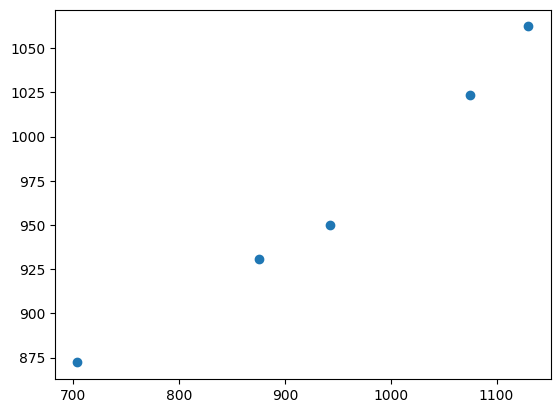

In [50]:
plt.scatter(y_test, y_pred)  #if linear relation than model performed well

In [51]:
residulas = y_test - y_pred   #error
residulas

11     51.677529
10     67.709667
22   -168.235166
14     -7.170890
20    -54.686959
Name: index_price, dtype: float64

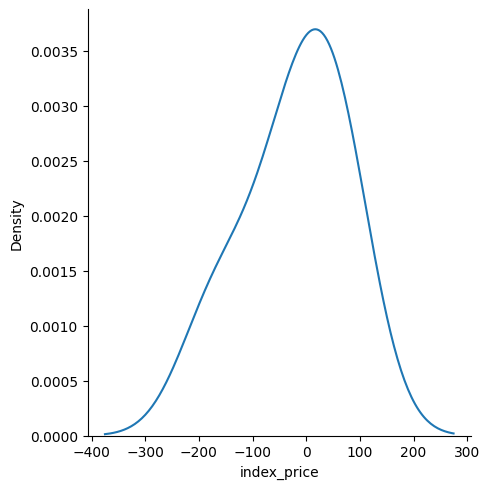

In [ ]:
# plot
sns.displot(residulas, kind='kde')  #if we get curve then model is good

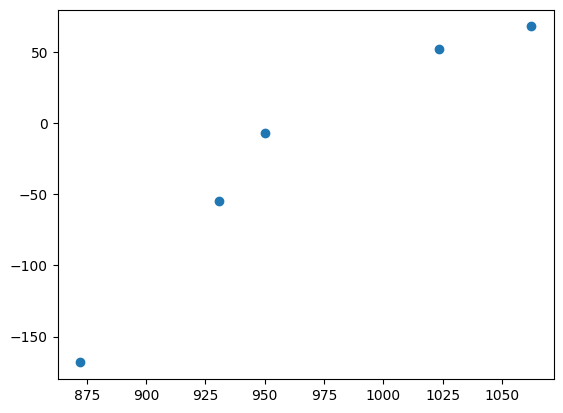

In [55]:
#scatter plot wrt prediction and residulas
plt.scatter(y_pred, residulas)

In [58]:
print("Some Details: ")
print("Coefficient: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)
print("Training Score: ", regressor.score(X_train, y_train)*100)
print("Testing Score: ", regressor.score(X_test, y_test)*100)


Some Details: 
Coefficient:  [132.27044464 -67.29146667]
Intercept:  1102.842105263158
Training Score:  91.46528617598105
Testing Score:  66.13091768846911


In [56]:
#OLS
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [57]:
model.summary()

e:\CODING\Data Science\DS from Scratch\myenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.031
Model:                            OLS   Adj. R-squared (uncentered):             -0.083
Method:                 Least Squares   F-statistic:                             0.2716
Date:                Sat, 11 Jan 2025   Prob (F-statistic):                       0.765
Time:                        19:23:32   Log-Likelihood:                         -160.10
No. Observations:                  19   AIC:                                      324.2
Df Residuals:                      17   BIC:                                      326.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           132.2704    876.248      0.151      0.882   -1716.452    1980.993
x2           -67.2915    876.248     -0.077      0.940   -1916.014    1781.431
==============================================================================
Omnibus:                        6.272   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                3.668
Skew:                          -0.872   Prob(JB):                        0.160
Kurtosis:                       4.261   Cond. No.                         6.39
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""